In [1]:
import numpy as np
from audlib.sig.window import hamming, rect
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, rfft, ifft
from audlib.sig.fbanks import LinFreq, MelFreq
plt.rc('text', usetex=True)

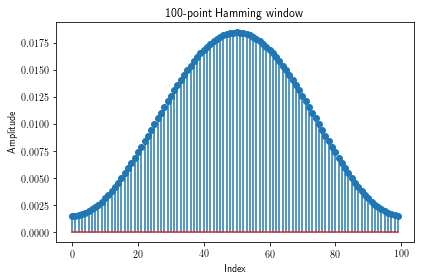

In [2]:
## Creating a Hamming window
sr = 16000
window_length = 0.010  # in seconds
hop_fraction = 0.25
wsize = 100
wind = hamming(wsize, normdc=True)
#wind = rect(wsize, normdc=True)
plt.stem(np.arange(wsize),wind)
plt.xlabel('Index'); plt.ylabel('Amplitude'); plt.title('{}-point Hamming window'.format(wsize))
plt.tight_layout()

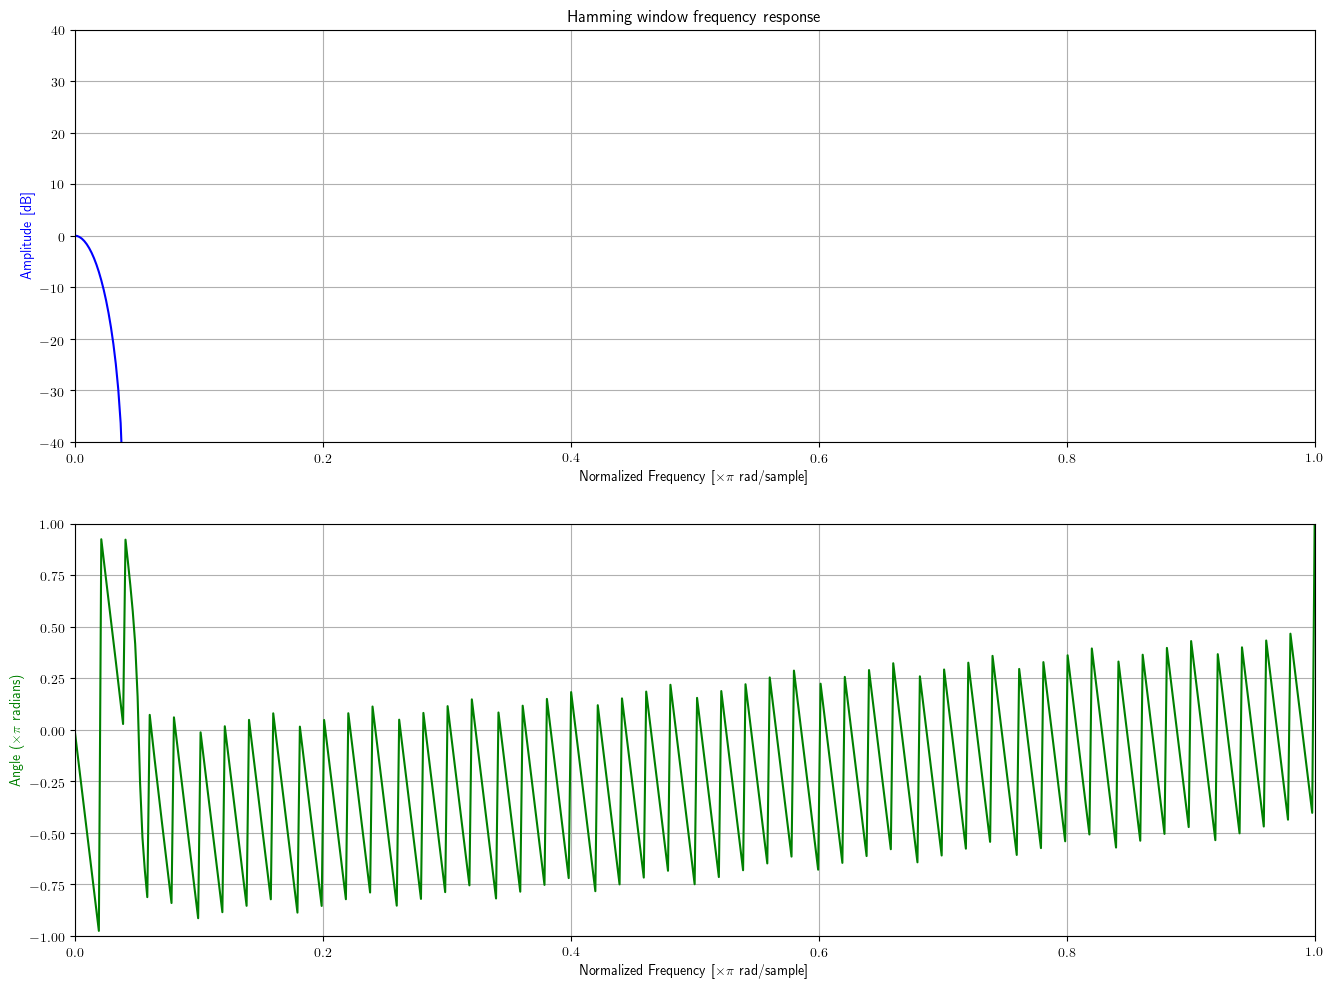

In [3]:
## Plot Hamming window's frequency response
nfft = max(1024, int(2**np.ceil(np.log2(wsize))))  # at least show 512 frequency points
#ww, hh = signal.freqz(wind, whole=True, worN=)
ww = np.linspace(0, 2, num=nfft, endpoint=False)[:(nfft//2+1)]
hh = rfft(wind, n=nfft)
#import ipdb; ipdb.set_trace()
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)
ax1.set_title('Hamming window frequency response')
ax1.plot(ww, 20*np.log10(np.abs(hh)+1e-16), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel(r'Normalized Frequency [$\times \pi$ rad/sample]')
ax1.set_ylim(-40, 40)
ax1.set_xlim(0, 1)
ax1.grid()
# Plot phase response
ax2 = fig.add_subplot(212)
angles = np.angle(hh)
ax2.plot(ww, angles/np.pi, 'g')
ax2.set_ylabel(r'Angle ($\times \pi$ radians)', color='g')
ax2.set_xlabel(r'Normalized Frequency [$\times \pi$ rad/sample]')
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, 1)
ax2.grid()

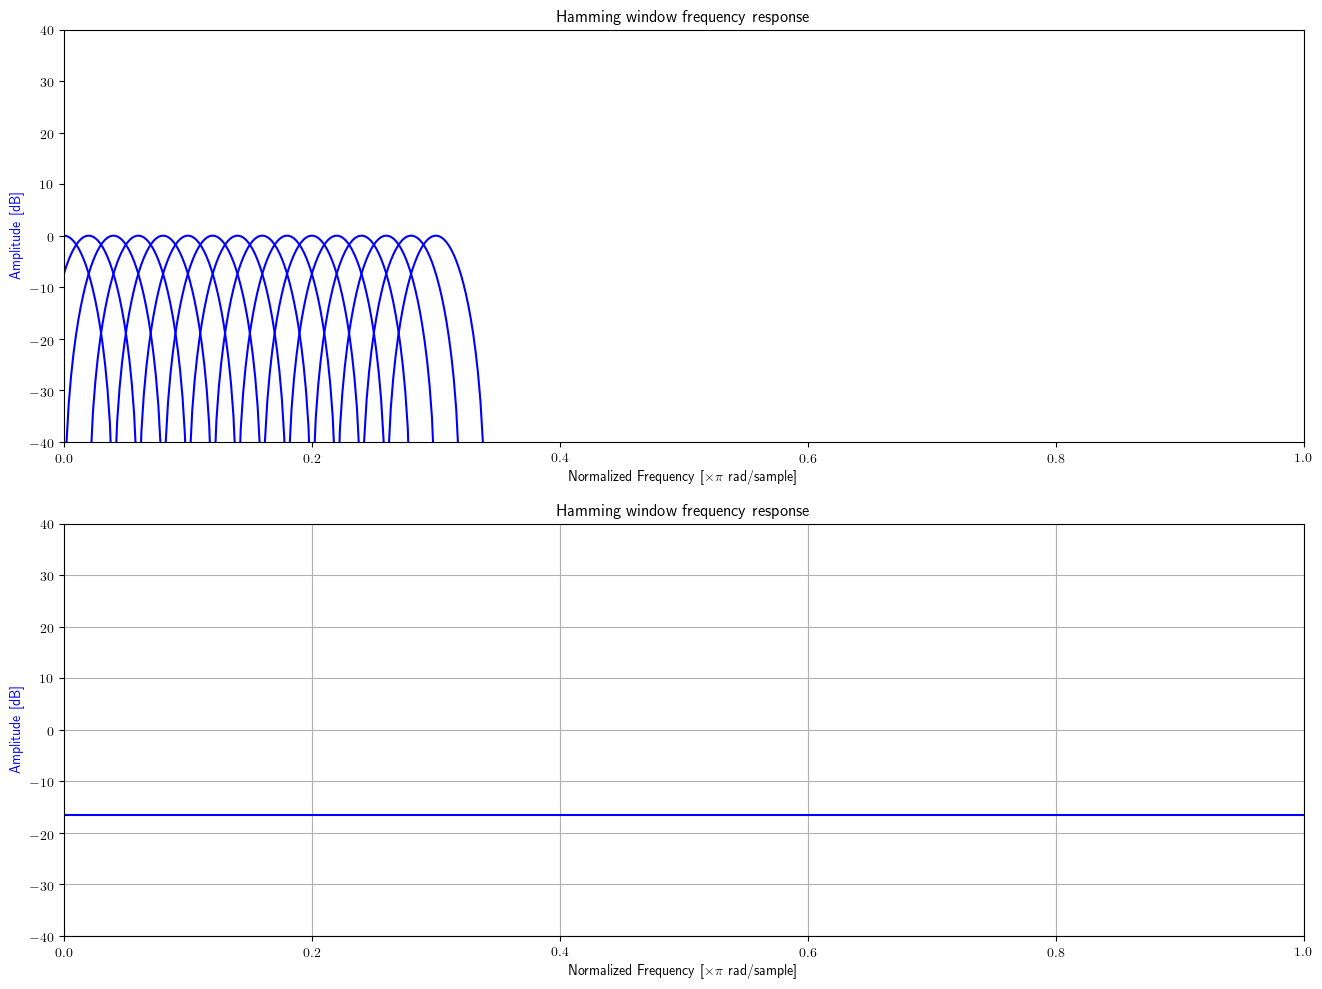

In [4]:
def plot_magresp(freq, resp, ax):
    ax.set_title('Hamming window frequency response')
    ax.plot(freq, 20*np.log10(np.abs(resp)+1e-16), 'b')
    ax.set_ylabel('Amplitude [dB]', color='b')
    ax.set_xlabel(r'Normalized Frequency [$\times \pi$ rad/sample]')
    ax.set_ylim(-40, 40)
    ax.set_xlim(0, 1)
    ax.grid()

def plot_phsresp(freq, resp, ax):
    ax.plot(freq, np.angle(resp)/np.pi, 'g')
    ax.set_ylabel(r'Angle ($\times \pi$ radians)', color='g')
    ax.set_xlabel(r'Normalized Frequency [$\times \pi$ rad/sample]')
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 1)
    ax.grid()
    
## Make a filterbank out of a prototype lowpass filter
fbank = LinFreq(wind)
H = np.zeros((len(fbank), 1024), dtype=np.complex_)
for k in range(len(fbank)):
    ww, hh = fbank.freqz(k)
    H[k] = hh
    
### Plot first 10 filter responses
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)
#plt.hold(True)
for kk in range(min(len(fbank), 16)):
    plot_magresp(ww, H[kk], ax1)
ax2 = fig.add_subplot(212)
plot_magresp(ww, np.sum(H, axis=0), ax2)